# Transfer Learning 
- Feature extraction

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16

In [29]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
# include_top = False it means that remove the top layer mean fully connected layer from right side

In [32]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,007,685 (80.14 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,195,332 (16.00 MB)

In [31]:
conv_base.trainable=False

In [ ]:
trainig_ds = keras.utils.image_dataset_from_directory(
    directory= r'D:\Machine Learning revision\CNN\cat-v-dog dataset\training_set',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150)
)

In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory= r'D:\Machine Learning revision\CNN\cat-v-dog dataset\test_set',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150)
)

In [ ]:
# normalize 
def normalize(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
trainig_ds = trainig_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history = model.fit(trainig_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1868s 7s/step - accuracy: 0.8626 - loss: 0.3139 - val_accuracy: 0.8883 - val_loss: 0.2624
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2060s 8s/step - accuracy: 0.9237 - loss: 0.1886 - val_accuracy: 0.9051 - val_loss: 0.2344
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1355s 5s/step - accuracy: 0.9435 - loss: 0.1405 - val_accuracy: 0.8967 - val_loss: 0.2523
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1210s 5s/step - accuracy: 0.9541 - loss: 0.1136 - val_accuracy: 0.9006 - val_loss: 0.2431
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1142s 5s/step - accuracy: 0.9581 - loss: 0.1028 - val_accuracy: 0.9051 - val_loss: 0.2633
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1177s 5s/step - accuracy: 0.9711 - loss: 0.0733 - val_accuracy: 0.9021 - val_loss: 0.2764
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1359s 5s/step - accuracy: 0.9882 - loss: 0.0438 - val_accuracy: 0.8962 - val_loss: 0.2876
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 59675s 239s/step - accuracy: 0.9886 - loss: 0.0383

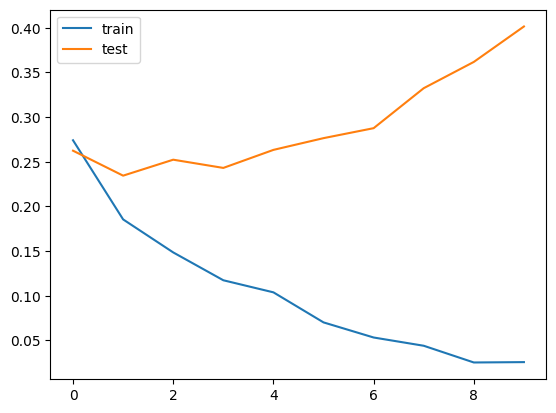

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

- this model is overfitted we can apply methods like batchnormalization, dropout, L1 and L2 regularization, data augmentationn to reduce overfiting problem